### Topics Covered

• Preprocessing Data for NN • FFNN for Binary Classification • FFNN for Multi-Class Classification • FFNN for Regression        • Convolutional Neural Networks 
• Visualize Loss History  • Visualize network Architecture • NN Weight Regularization(L2) • Dropout • LSTM 


#### Preprocessing Data for NN

Typically, a neural network’s parameters are initialized (i.e. created) as small random numbers. Neural networks often behave poorly when the feature values much larger than parameter values. Furthermore, since an observation’s feature values will are combined as they pass through individual units, it is important that all features have the same scale.

For these reasons, it is best practice (although not always necessary, for example when we have all binary features) to standardize each feature such that the feature’s values have the mean of 0 and the standard deviation of 1. This can be easily accomplished using scikit-learn’s StandardScaler.

In [62]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [63]:
# Create feature
features = np.array([[-100.1, 3240.1], 
                     [-200.2, -234.1], 
                     [5000.5, 150.1], 
                     [6000.6, -125.1], 
                     [9000.9, -673.1]])

In [64]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
features_standardized = scaler.fit_transform(features)

In [65]:
# Show feature
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [66]:
# Print mean and standard deviation
print('Mean:', round(features_standardized[:,0].mean()))
print('Standard deviation:', features_standardized[:,0].std())

Mean: 0.0
Standard deviation: 0.9999999999999999


#### FFNN for Binary Classification

### Keras IMDB Dataset

The info about keras imdb dataset is available [here](http://localhost:8888/edit/Desktop/Python_revision/Chris_Albon_Blog_Prac/Imdb_info.txt).

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

Using TensorFlow backend.


In [49]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [50]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [51]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric


#### Visualize Loss History

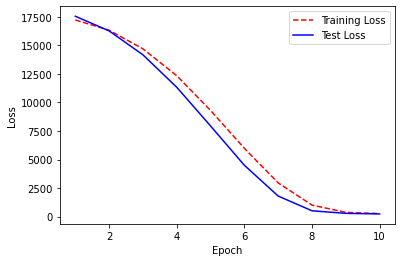

In [54]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### Train Feedforward Neural Network
In Keras, we train our neural network using the fit method. There are six significant parameters to define. The first two parameters are the features and target vector of the training data.

The epochs parameter defines how many epochs to use when training the data. verbose determines how much information is outputted during the training process, with 0 being no out, 1 outputting a progress bar, and 2 one log line per epoch. batch_size sets the number of observations to propagate through the network before updating the parameters.

Finally, we held out a test set of data to use to evaluate the model. These test features and test target vector can be arguments of the validation_data, which will use them for evaluation. Alternatively, we could have used validation_split to define what fraction of the training data we want to hold out for evaluation.

In scikit-learn fit method returned a trained model, however in Keras the fit method returns a History object containing the loss values and performance metrics at each epoch.

In [13]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Number of epochs
                      verbose=1, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 3s 137us/step - loss: 0.4195 - accuracy: 0.8120 - val_loss: 0.3394 - val_accuracy: 0.8546
Epoch 2/3
25000/25000 [==============================] - 3s 112us/step - loss: 0.3225 - accuracy: 0.8641 - val_loss: 0.3284 - val_accuracy: 0.8594
Epoch 3/3
25000/25000 [==============================] - 2s 95us/step - loss: 0.3107 - accuracy: 0.8691 - val_loss: 0.3392 - val_accuracy: 0.8537


#### Feedforward Neural Network For Multiclass Classification

In [14]:
##Reuters newswire classification dataset
### different categories

In [15]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [16]:
# Set the number of features we want
number_of_features = 5000

# Load feature and target data
(train_data, train_target_vector), (test_data, test_target_vector) = reuters.load_data(num_words=number_of_features)

# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

# One-hot encode target vector to create a target matrix
train_target = to_categorical(train_target_vector)
test_target = to_categorical(test_target_vector)


2113536/2110848 [==============================] - 15s 7us/step


In [26]:
len(train_target[0])  ###Implies one hot encoding has been done

46

In [28]:
#Construct Neural Network Architecture

In [29]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation='relu'))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=46, activation='softmax'))

In [30]:
# Compile neural network
network.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [33]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Three epochs
                      verbose=1, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data to use for evaluation

Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 3s 279us/step - loss: 0.3581 - accuracy: 0.9200 - val_loss: 0.9212 - val_accuracy: 0.7961
Epoch 2/3
8982/8982 [==============================] - 2s 229us/step - loss: 0.2665 - accuracy: 0.9400 - val_loss: 0.9495 - val_accuracy: 0.8001
Epoch 3/3
8982/8982 [==============================] - 3s 282us/step - loss: 0.2239 - accuracy: 0.9454 - val_loss: 0.9950 - val_accuracy: 0.7970


#### FFNN for Regression

In [34]:
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [35]:
# Generate features matrix and target vector
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# Divide our data into training and test sets
train_features, test_features, train_target, test_target = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.33, 
                                                                            random_state=0)

In [37]:
###Create NN Architecture
##Start NN
network = models.Sequential()

##Add fully connected layer with ReLu activation
network.add(layers.Dense(units = 32,activation = 'relu',input_shape = (train_features.shape[1],)))

###Add another fully connected layer with relu activation
network.add(layers.Dense(units=32, activation='relu'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

In [38]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                metrics=['mse']) # Mean squared error

In [39]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=10, # Number of epochs
                      verbose=1, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

Train on 6700 samples, validate on 3300 samples
Epoch 1/10
6700/6700 [==============================] - 2s 262us/step - loss: 17232.3343 - mse: 17232.3320 - val_loss: 17555.8796 - val_mse: 17555.8770
Epoch 2/10
6700/6700 [==============================] - 0s 33us/step - loss: 16329.4387 - mse: 16329.4375 - val_loss: 16272.0335 - val_mse: 16272.0342
Epoch 3/10
6700/6700 [==============================] - 0s 31us/step - loss: 14701.0309 - mse: 14701.0293 - val_loss: 14176.7801 - val_mse: 14176.7832
Epoch 4/10
6700/6700 [==============================] - 0s 30us/step - loss: 12346.3557 - mse: 12346.3574 - val_loss: 11334.1993 - val_mse: 11334.1973
Epoch 5/10
6700/6700 [==============================] - 0s 30us/step - loss: 9302.8076 - mse: 9302.8076 - val_loss: 7940.3479 - val_mse: 7940.3477
Epoch 6/10
6700/6700 [==============================] - 1s 117us/step - loss: 5983.1162 - mse: 5983.1157 - val_loss: 4496.0978 - val_mse: 4496.0977
Epoch 7/10
6700/6700 [==============================

#### Convolutional Neural Networks

#### Create Convolutional Neural Network Architecture
Convolutional neural networks (also called ConvNets) are a popular type of network that has proven very effective at computer vision (e.g. recognizing cats, dogs, planes, and even hot dogs). It is completely possible to use feedforward neural networks on images, where each pixel is a feature. However, when doing so we run into two major problems.

First, a feedforward neural networks do not take into account the spatial structure of the pixels. For example, in a 10x10 pixel image we might convert it into a vector of 100 pixel features, and in this case feedforward would consider the first feature (e.g. pixel value) to have the same relationship with the 10th feature as the 11th feature. However, in reality the 10th feature represents a pixel on the far side of the image as the first feature, while the 11th feature represents the pixel immediately below the first pixel.

Second, and relatedly, feedforward neural networks learn global relationships in the features instead of local patterns. In more practical terms, this means that feedforward neural networks are not able to detect an object regardless of where it appears in an image. For example, imagine we are training a neural network to recognize faces, these faces might appear anywhere in the image from the upper right to the middle to the lower left. The power of convolutional neural networks is their ability handle both of these issues (and others).

In [40]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K 

# Set that the color channel value will be first
K.set_image_data_format('channels_first')

In [41]:
# Set image information
channels = 1   ###Greyascale image
height = 28
width = 28

# Load data and target from MNIST data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

# Reshape training image data into features
train_data = train_data.reshape(train_data.shape[0], channels, height, width)

# Reshape test image data into features
test_data = test_data.reshape(test_data.shape[0], channels, height, width)

# Rescale pixel intensity to between 0 and 1
train_features = train_data / 255    ###Rescaling
test_features = test_data / 255
#print(test_target)  ##It was in form of numerical i.e 0 to 9

# One-hot encode target
train_target = np_utils.to_categorical(train_target)
test_target = np_utils.to_categorical(test_target)
number_of_classes = test_target.shape[1]

[7 2 1 ... 4 5 6]


In [44]:
# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(channels, width, height), activation='relu'))

# Add max pooling layer with a 2x2 window    ####To reduce the dimensions
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer              ###To avoid overfitting
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation='relu'))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation='softmax'))

In [45]:
# Compile neural network
network.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [46]:
# Train neural network
network.fit(train_features, # Features
            train_target, # Target
            epochs=2, # Number of epochs
            verbose=1, # Don't print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(test_features, test_target)) # Data for evaluation

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 208s 3ms/step - loss: 0.6267 - accuracy: 0.8062 - val_loss: 0.1675 - val_accuracy: 0.9518
Epoch 2/2
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1983 - accuracy: 0.9422 - val_loss: 0.0880 - val_accuracy: 0.9728


### Visualize network Architecture

In [55]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [56]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(10,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [69]:
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
# Save the visualization as a file
plot_model(network, show_shapes=True, to_file='network.png')

#### NN Weight Regularization

In [70]:
from keras import regularizers


In [71]:
###Load IMDB data

#### Create Neural Network Architecture With Weight Regularization
In Keras, we can add a weight regularization by including using including kernel_regularizer=regularizers.l2(0.01) a later. In this example, 0.01 determines how much we penalize higher parameter values.

In [72]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function and L2 regularization
network.add(layers.Dense(units=16, 
                         activation='relu', 
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function and L2 regularization
network.add(layers.Dense(units=16, 
                         kernel_regularizer=regularizers.l2(0.01),
                         activation='relu'))

In [73]:
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [74]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

#### Construct Neural Network Architecture With Dropout Layer
In Keras, we can implement dropout by added Dropout layers into our network architecture. Each Dropout layer will drop a user-defined hyperparameter of units in the previous layer every batch. Remember in Keras the input layer is assumed to be the first layer and not added using the add. Therefore, if we want to add dropout to the input layer, the layer we add in our is a dropout layer. This layer contains both the proportion of the input layer’s units to drop 0.2 and input_shape defining the shape of the observation data. Next, after we add a dropout layer with 0.5 after each of the hidden layers.

### LSTM Recurrent Neural Network
Oftentimes we have text data that we want to classify. While it is possible to use a type of convolutional network, we are going to focus on a more popular option: the recurrent neural network. The key feature of recurrent neural networks is that information loops back in the network. This gives recurrent neural networks a type of memory it can use to better understand sequential data. A popular choice type of recurrent neural network is the long short-term memory (LSTM) network which allows for information to loop backwards in the network.

In [1]:
from keras.preprocessing import sequence

Using TensorFlow backend.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import imdb

IMDB data info :  [here](http://localhost:8888/edit/Desktop/Python_revision/Chris_Albon_Blog_Prac/Imdb_info.txt)

In [4]:
# Set the number of features we want   ###Here 1000 top words 
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features) ###Only load the top 1000 words

# Use padding or truncation to make each observation have 400 features
###We will bound reviews at 400 words, truncating longer reviews and zero-padding shorter reviews
train_features = sequence.pad_sequences(train_data, maxlen=400)
test_features = sequence.pad_sequences(test_data, maxlen=400)

In [28]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(train_data))))    ###hstack stacks arrays horizontally

Number of words: 
998


Review length: 
Mean 238.71 words (176.493674)


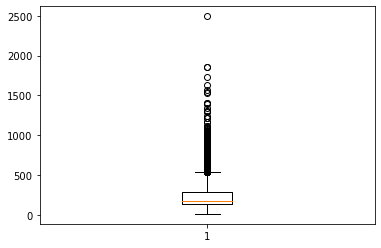

In [30]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in train_data]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

We will use an Embedding layer as the input layer, setting the vocabulary to 1000 , the word vector size to 1000 dimensions and the input_length to 400. The output of this first layer will be a 1000×400 sized matrix as discussed in the previous section.
##### To convert positive integer representations of words into a word embedding(vector) we are using an Embedding layer.

In [40]:
from keras import layers,models

In [41]:
##Create LSTM Neural Network Architecture
# Start neural network
network = models.Sequential()

# Add an embedding layer
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# Add a long short-term memory layer with 128 units
network.add(layers.LSTM(units=128))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [42]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='Adam', # Adam optimization
                metrics=['accuracy']) # Accuracy performance metric

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
# Train neural network  ##We use less no. of epochs as this models overfit easily
history = network.fit(train_features, # Features
                      train_target, # Target
                      epochs=3, # Number of epochs  
                      verbose=1, # Do not print description after each epoch
                      batch_size=1000, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 514s 21ms/step - loss: 0.6885 - accuracy: 0.5744 - val_loss: 0.6648 - val_accuracy: 0.5848
Epoch 2/3
25000/25000 [==============================] - 448s 18ms/step - loss: 0.6387 - accuracy: 0.6776 - val_loss: 0.5750 - val_accuracy: 0.7560
Epoch 3/3
25000/25000 [==============================] - 353s 14ms/step - loss: 0.4534 - accuracy: 0.8021 - val_loss: 0.3999 - val_accuracy: 0.8274
